# Baseball Salary Analysis

__In this exercise I will look at the baseball salary data and analyze trends based on__
- Time (year) and 
- League 

__To do this, I will use__
- Seaborn plots
- Linear Regression
- Multiple Linear Regression



In [100]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pb
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

In [101]:
df = pb.read_csv('Salaries.csv')

In [102]:
#divide salary by 1 million
df['salary']=df['salary'].divide(1000000)

In [103]:
df.head()

,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,0.870000
1,1985,ATL,NL,bedrost01,0.550000
2,1985,ATL,NL,benedbr01,0.545000
3,1985,ATL,NL,campri01,0.633333
4,1985,ATL,NL,ceronri01,0.625000


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26428 entries, 0 to 26427
Data columns (total 5 columns):
yearID      26428 non-null int64
teamID      26428 non-null object
lgID        26428 non-null object
playerID    26428 non-null object
salary      26428 non-null float64
dtypes: float64(1), int64(1), object(3)
memory usage: 1.0+ MB


<Figure size 864x864 with 0 Axes>

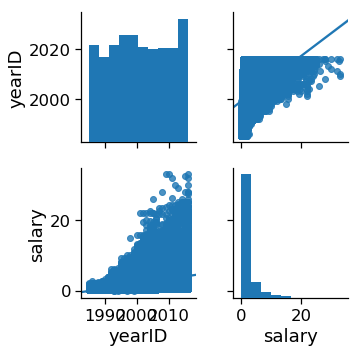

In [105]:
plt.figure(figsize=(12,12))
sns.pairplot(df,kind = "reg");

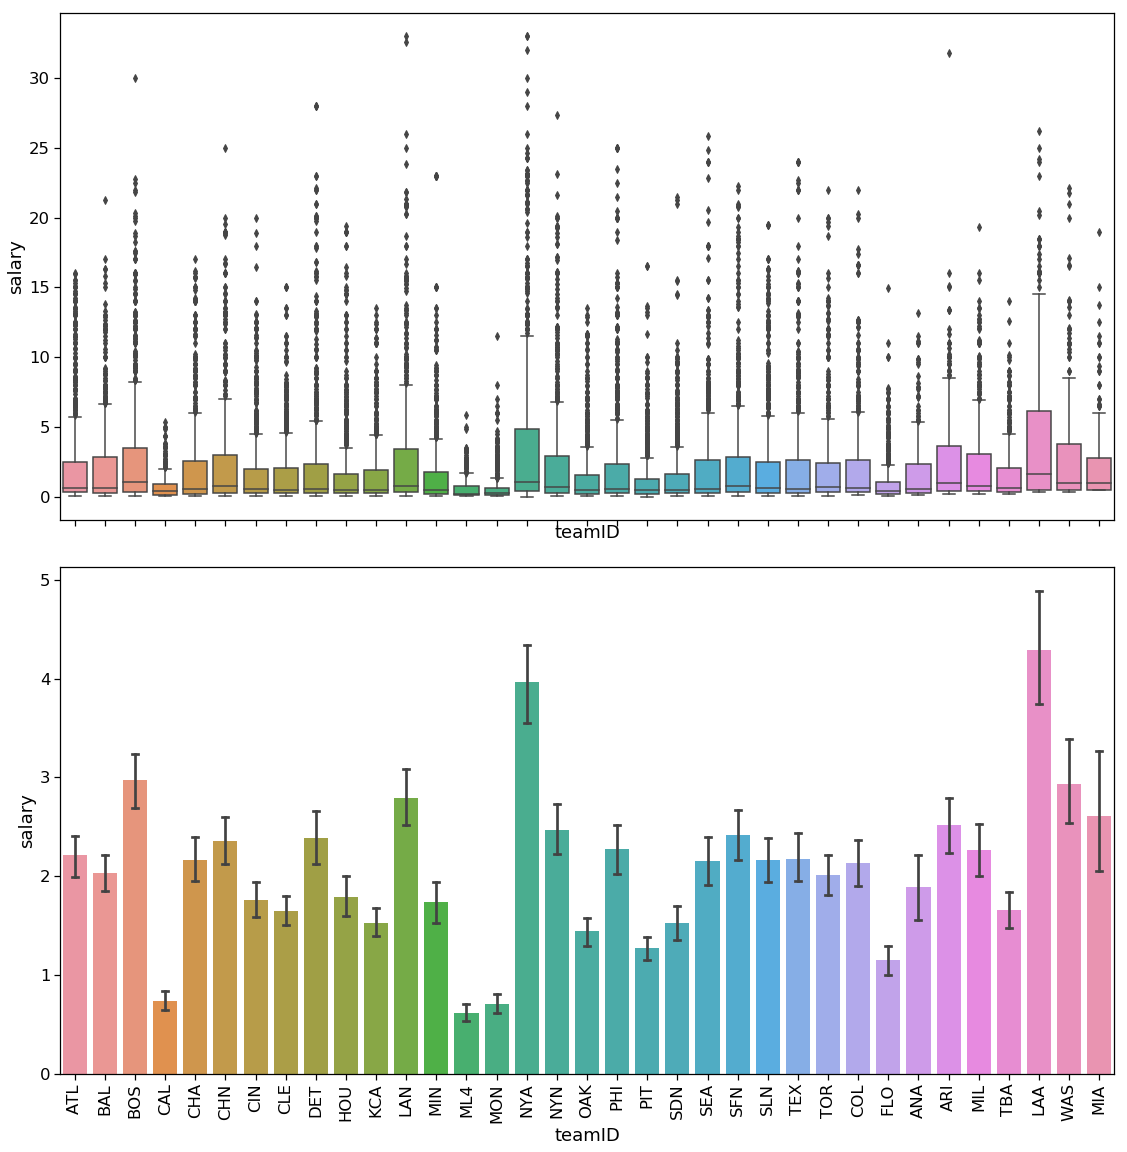

In [99]:
fig, axarr = plt.subplots(2, 1, figsize=(16, 16), sharex=True, sharey = False)
sns.set_context("notebook", font_scale=1.5)
sns.barplot(x="teamID", y = 'salary', data=df,capsize=.2, ax=axarr[1]);
sns.boxplot(x="teamID", y = 'salary', data=df, ax=axarr[0]);
plt.tight_layout()
plt.xticks(rotation=90);

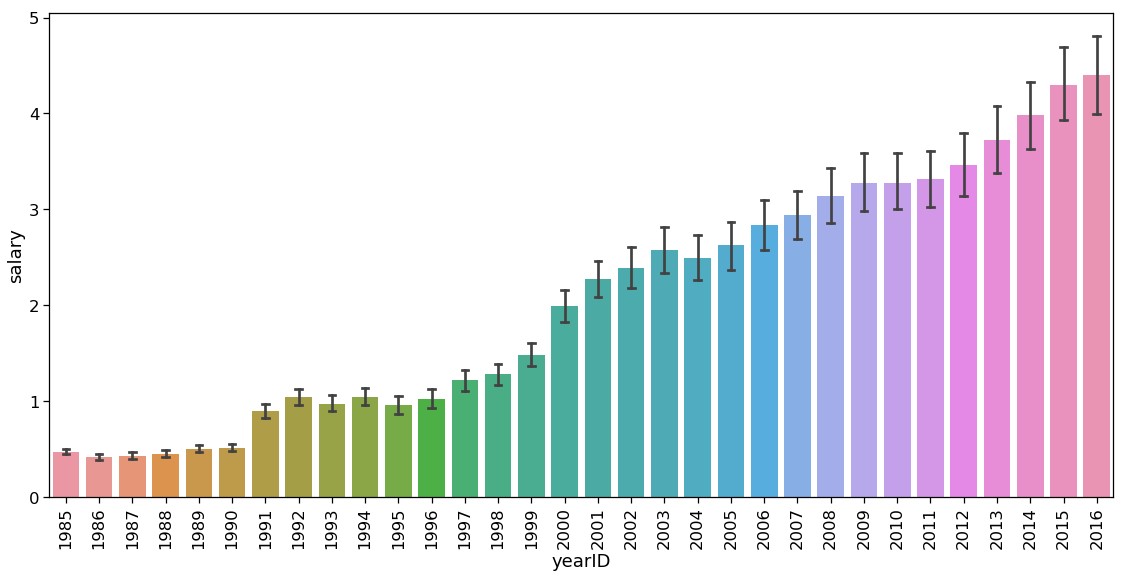

In [83]:
#fig, axarr = plt.subplots(2, 1, figsize=(16, 16))

plt.figure(figsize=(16,8))
sns.set_context("notebook", font_scale=1.5)
sns.barplot(x="yearID", y = 'salary', data=df,capsize=.2);
#sns.boxplot(x="t", y = 'salary', data=df, ax=axarr[0]);
plt.tight_layout()
plt.xticks(rotation=90);

In [84]:
df2 = df.groupby('yearID',as_index=False)['salary'].mean()

In [85]:
df2.head()

,yearID,salary
0,1985,0.476299
1,1986,0.417147
2,1987,0.434729
3,1988,0.453171
4,1989,0.506323


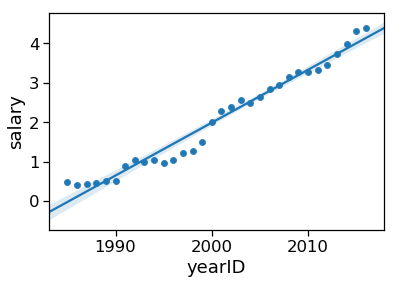

In [86]:
sns.scatterplot(x='yearID',y='salary',data = df2);
sns.regplot(x='yearID',y='salary', data=df2);

In [87]:
df2['intercept'] = 1

lm = sm.OLS(df2['salary'], df2[['intercept', 'yearID']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     960.8
Date:                Fri, 05 Jul 2019   Prob (F-statistic):           2.42e-24
Time:                        02:10:09   Log-Likelihood:                 3.2038
No. Observations:                  32   AIC:                            -2.408
Df Residuals:                      30   BIC:                            0.5239
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   -266.3725      8.660    -30.759      0.000    -284.059    -248.686
yearID         0.1342      0.004     30.997      0.000       0.125       0.143
==============================================================================
Omnibus:                        0.587   Durbin-Watson:                   0.377
Prob(Omnibus):                  0.745   Jarque-Bera (JB):                0.383
Skew:                          -0.261   Prob(JB):                        0.826
Kurtosis:                       2.878   Cond. No.                     4.33e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.33e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [88]:
mean_increase = (df2.salary.max()- df2.salary.min())/df2.salary.min()
print('The mean increase in the player salary is '+ str(int(mean_increase)) + '% per year')

The mean increase in the player salary is 9% per year


__An increase of 9% compares favorably with the average inflation rate of 2.6% since 1985__

In [89]:
df3 = df.groupby(['yearID','lgID'],as_index=False)['salary'].mean()

In [90]:

df3['AL'] = pb.get_dummies(df3['lgID'])['AL']
df3.head()

,yearID,lgID,salary,AL
0,1985,AL,0.455597,1
1,1985,NL,0.500249,0
2,1986,AL,0.402338,1
3,1986,NL,0.433925,0
4,1987,AL,0.441847,1


In [91]:
df3['intercept'] = 1
lm = sm.OLS(df3['salary'], df3[['intercept', 'yearID', 'AL']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     798.3
Date:                Fri, 05 Jul 2019   Prob (F-statistic):           1.82e-44
Time:                        02:10:29   Log-Likelihood:               -0.31810
No. Observations:                  64   AIC:                             6.636
Df Residuals:                      61   BIC:                             13.11
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   -267.0404      6.746    -39.584      0.000    -280.530    -253.551
yearID         0.1345      0.003     39.879      0.000       0.128       0.141
AL             0.1552      0.062      2.492      0.015       0.031       0.280
==============================================================================
Omnibus:                        0.051   Durbin-Watson:                   0.816
Prob(Omnibus):                  0.975   Jarque-Bera (JB):                0.192
Skew:                           0.055   Prob(JB):                        0.908
Kurtosis:                       2.755   Cond. No.                     4.33e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.33e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

__AL Players made 150K more than the NL players on average over the duration__

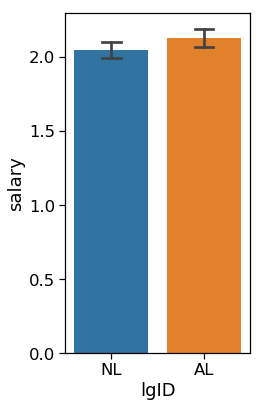

In [93]:
plt.figure(figsize=(4,6))
sns.set_context("notebook", font_scale=1.5)
sns.barplot(x="lgID", y = 'salary', data=df,capsize=.2);
plt.tight_layout()

Baseball database
http://www.seanlahman.com/baseball-archive/statistics/